In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import yfinance as yf

In [3]:
tamo = yf.Ticker('TATAMOTORS.NS')

In [4]:
df = tamo.history(period='max', interval='1d')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8699 entries, 1991-01-02 00:00:00+05:30 to 2025-06-13 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8699 non-null   float64
 1   High          8699 non-null   float64
 2   Low           8699 non-null   float64
 3   Close         8699 non-null   float64
 4   Volume        8699 non-null   int64  
 5   Dividends     8699 non-null   float64
 6   Stock Splits  8699 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 543.7 KB


In [6]:
df.index = pd.to_datetime(df.index)
df.index = df.index.tz_localize(None).normalize()
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8699 non-null   datetime64[ns]
 1   Open          8699 non-null   float64       
 2   High          8699 non-null   float64       
 3   Low           8699 non-null   float64       
 4   Close         8699 non-null   float64       
 5   Volume        8699 non-null   int64         
 6   Dividends     8699 non-null   float64       
 7   Stock Splits  8699 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 543.8 KB


In [7]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1991-01-02,14.917163,15.556470,14.917163,15.556470,0,0.0,0.0
1,1991-01-03,14.917163,15.556470,14.917163,15.556470,0,0.0,0.0
2,1991-01-04,15.556470,15.556470,15.556470,15.556470,0,0.0,0.0
3,1991-01-07,14.490958,15.130266,14.277857,15.023715,0,0.0,0.0
4,1991-01-08,15.023715,15.023715,15.023715,15.023715,0,0.0,0.0
...,...,...,...,...,...,...,...,...
8694,2025-06-09,715.000000,726.000000,713.099976,717.799988,9900412,0.0,0.0
8695,2025-06-10,721.000000,734.750000,715.349976,732.250000,19151889,0.0,0.0
8696,2025-06-11,734.950012,744.000000,730.150024,736.400024,12626754,0.0,0.0
8697,2025-06-12,737.000000,737.700012,711.250000,715.349976,12585149,0.0,0.0


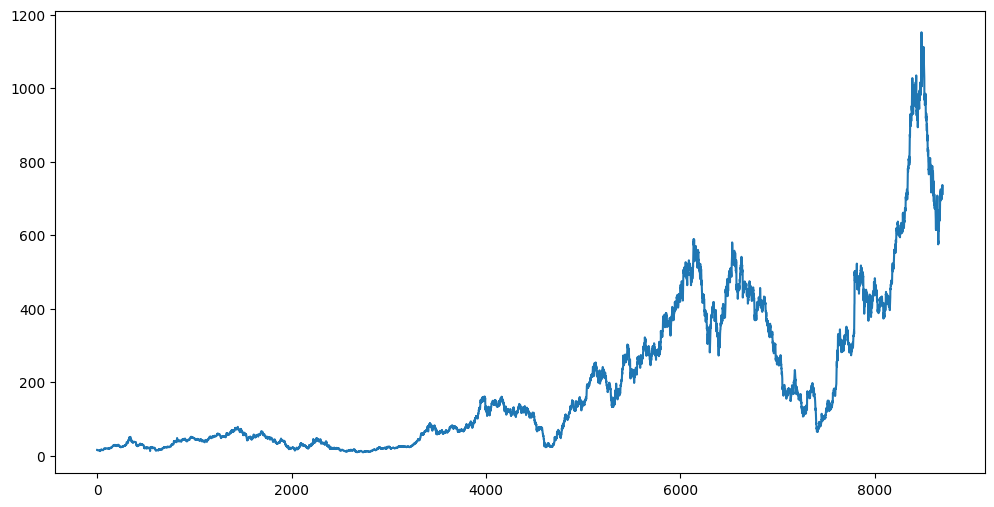

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'], label='Closing prices')
plt.show()

In [9]:
new_df = df.drop(columns=['Volume', 'Dividends', 'Stock Splits', 'High', 'Low', 'Open'])

In [10]:
new_df

,Date,Close
0,1991-01-02,15.556470
1,1991-01-03,15.556470
2,1991-01-04,15.556470
3,1991-01-07,15.023715
4,1991-01-08,15.023715
...,...,...
8694,2025-06-09,717.799988
8695,2025-06-10,732.250000
8696,2025-06-11,736.400024
8697,2025-06-12,715.349976


In [11]:
new_df.index = new_df['Date']
new_df = new_df.drop(columns=['Date'])

In [12]:
new_df

,Close
Date,
1991-01-02,15.556470
1991-01-03,15.556470
1991-01-04,15.556470
1991-01-07,15.023715
1991-01-08,15.023715
...,...
2025-06-09,717.799988
2025-06-10,732.250000
2025-06-11,736.400024


In [13]:
train_data = new_df[:7000]
val_data = new_df[7000:]

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_data)

In [16]:
x_train_data, y_train_data = [], []

for i in range(60, len(scaled_train_data)):
  x_train_data.append(scaled_train_data[i-60:i, 0])
  y_train_data.append(scaled_train_data[i,0])

In [17]:
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

In [18]:
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [19]:
model = Sequential()

In [20]:
model.add(LSTM(units = 150, return_sequences = True, input_shape = (x_train_data.shape[1], 1)))
model.add(LSTM(units=150))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
inputs_data = new_df[len(new_df)- len(val_data)-60:].values

In [22]:
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=50, batch_size=32)

Epoch 1/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 50s 208ms/step - loss: 0.0044
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 83s 213ms/step - loss: 2.5021e-04
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 45s 206ms/step - loss: 1.9276e-04
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 84s 217ms/step - loss: 2.3693e-04
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - loss: 1.9030e-04
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 81s 215ms/step - loss: 1.5887e-04
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 48s 220ms/step - loss: 1.3835e-04
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 79s 208ms/step - loss: 1.3236e-04
Epoch 9/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 83s 212ms/step - loss: 1.2645e-04
Epoch 10/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 82s 214ms/step - loss: 1.2225e-04
Epoch 11/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 47s 215ms/step - loss: 9.4089e-05
Epoch 12/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 51s 234ms/step - loss: 9.3498e-05
Epoch 13/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 81s 228ms/step - loss: 1.2394e-04
Epoch 14/50
217/217 ━━━━━━━━━━━━━━━━━━

In [25]:
x_test = []

for i in range(60, inputs_data.shape[0]):
  x_test.append(inputs_data[i-60,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], 1, 1))

In [26]:
predicted_closing_price = model.predict(x_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [27]:
model.save('save_model.h5')

In [28]:
val_data['Predictions'] = predicted_closing_price

<ipython-input-28-3027228135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Predictions'] = predicted_closing_price


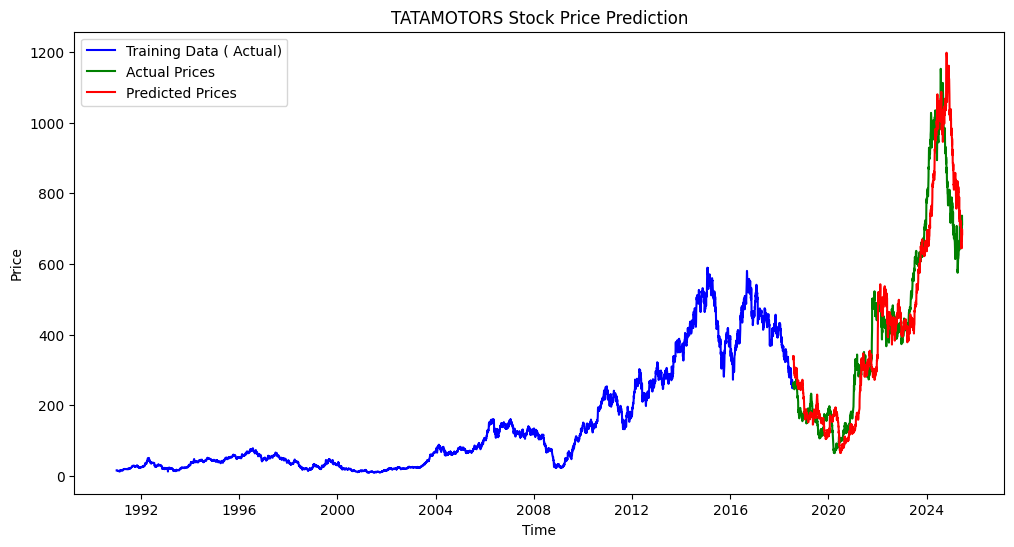

In [37]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Training Data ( Actual)', color='blue')
plt.plot(val_data['Close'], label='Actual Prices', color='green')
plt.plot(val_data['Predictions'], label='Predicted Prices', color='red')
plt.title('TATAMOTORS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
mse = mean_squared_error(val_data['Close'], val_data['Predictions'])
mae = mean_absolute_error(val_data['Close'], val_data['Predictions'])
r2 = r2_score(val_data['Close'], val_data['Predictions'])

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9978.410566390952
Mean Absolute Error: 72.64900515569245
R-squared: 0.8669226482765464
